In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize
from time import time
import sys
sys.path.append('..')

In [2]:
from osd import Problem
from osd.components import GaussNoise, SmoothSecondDifference, SmoothFirstDifference
import cvxpy as cvx

# Simple Signal

In [3]:
np.random.seed(42)
t = np.linspace(0, 1000, 3000)
# signal1 = (np.sin(2 * np.pi * t * 5 / (500.))
#            + np.cos(2 * np.pi * t * 7 / (550.) + np.sin(2 * np.pi * t * 13 / (550.))))
signal1 = np.sin(2 * np.pi * t * 1 / (500.))
y = signal1 + 0.25 * np.random.randn(len(signal1))

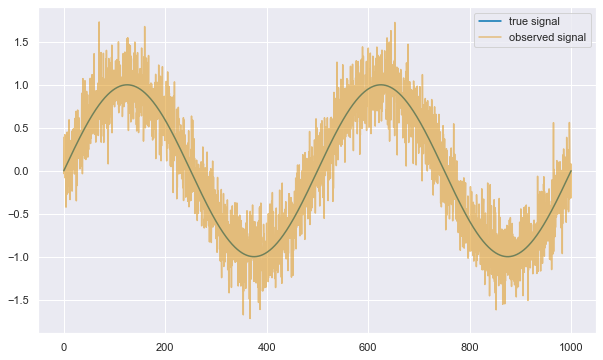

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, y, alpha=0.5, label='observed signal')
plt.legend()
plt.show()

## First-Order Difference Smoothing

In [6]:
problem = Problem(data=y, components=[GaussNoise, SmoothFirstDifference])
problem.optimize_weights(solver='MOSEK')
problem.weights.value

NameError: name 'val' is not defined

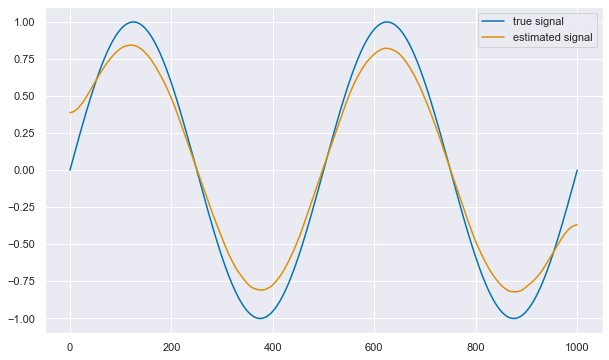

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [ ]:
problem.holdout_validation(solver='MOSEK', seed=42)

## Second-Order Difference Smoothing

In [ ]:
problem = Problem(data=y, components=[GaussNoise, SmoothSecondDifference])
problem.optimize_weights(solver='MOSEK')
problem.weights.value

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [ ]:
problem.holdout_validation(solver='MOSEK', seed=42)

# More Complex Signal

In [ ]:
np.random.seed(42)
t = np.linspace(0, 1000, 3000)
signal1 = (np.sin(2 * np.pi * t * 5 / (500.))
           + np.cos(2 * np.pi * t * 7 / (550.) + np.sin(2 * np.pi * t * 13 / (550.))))
y = signal1 + 0.25 * np.random.randn(len(signal1))

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, y, alpha=0.5, label='observed signal')
plt.legend()
plt.show()

## First-Order Difference Smoothing

In [ ]:
problem = Problem(data=y, components=[GaussNoise, SmoothFirstDifference])
problem.optimize_weights(solver='MOSEK')
problem.weights.value

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [ ]:
problem.holdout_validation(solver='MOSEK', seed=42)

## Second-Order Difference Smoothing

In [ ]:
problem = Problem(data=y, components=[GaussNoise, SmoothSecondDifference])
problem.optimize_parameters(solver='MOSEK')
problem.components[1].parameters[0].value

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [ ]:
problem.holdout_validation(solver='MOSEK', seed=42)